# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
datos = pd.read_csv(url, sep=";")

datos.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
datos.shape

(41188, 21)

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
datos.duplicated().sum()

np.int64(12)

In [5]:
data_limpia = datos.drop_duplicates()
print(data_limpia.shape)
data_limpia.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
num_cols = data_limpia.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data_limpia.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


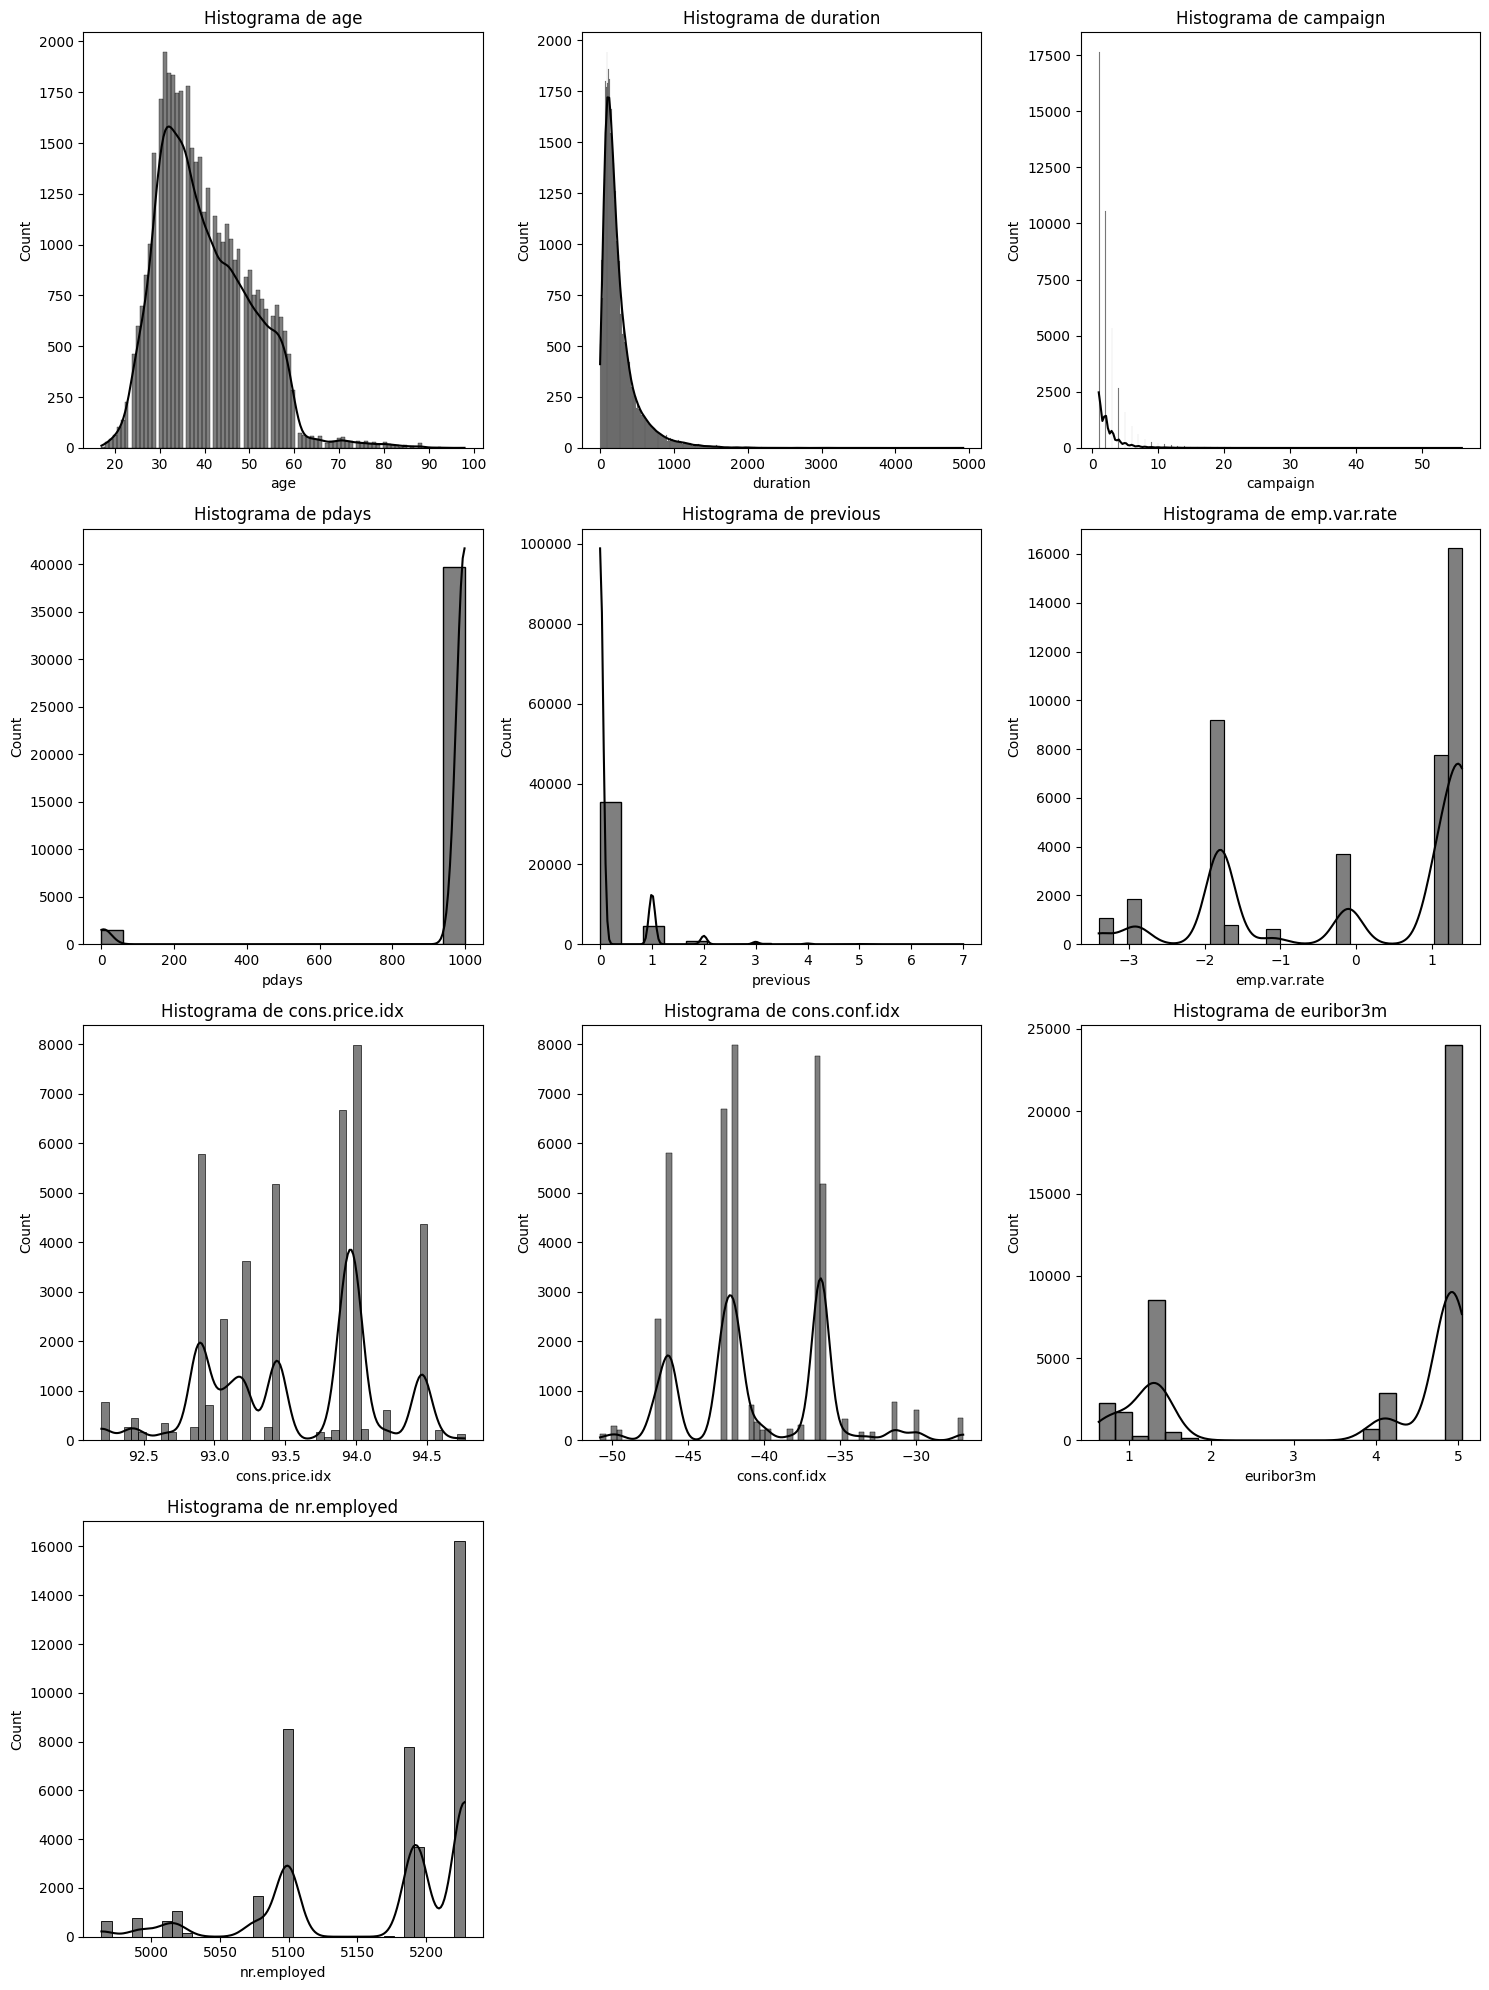

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Usar la variable ya definida num_cols
columns = num_cols

# Fijar el número de columnas por fila a 3
cols_per_row = 3

# Calcular el número de filas necesarias
num_rows = math.ceil(len(columns) / cols_per_row)

# Crear la figura con subgráficos (axes) y un tamaño más grande
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Asegurarse de que 'axes' sea una lista bidimensional
axes = axes.reshape(num_rows, cols_per_row) if num_rows > 1 else [axes]

# Generar los gráficos (histogramas)
col_index = 0
for row in range(num_rows):
    for col in range(cols_per_row):
        if col_index < len(columns):
            sns.histplot(data=data_limpia, x=columns[col_index], kde=True, ax=axes[row][col], color="black")
            axes[row][col].set_title(f"Histograma de {columns[col_index]}")
            col_index += 1
        else:
            # Ocultar los ejes vacíos en lugar de eliminarlos
            axes[row][col].axis("off")  # Desactivar los ejes vacíos

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


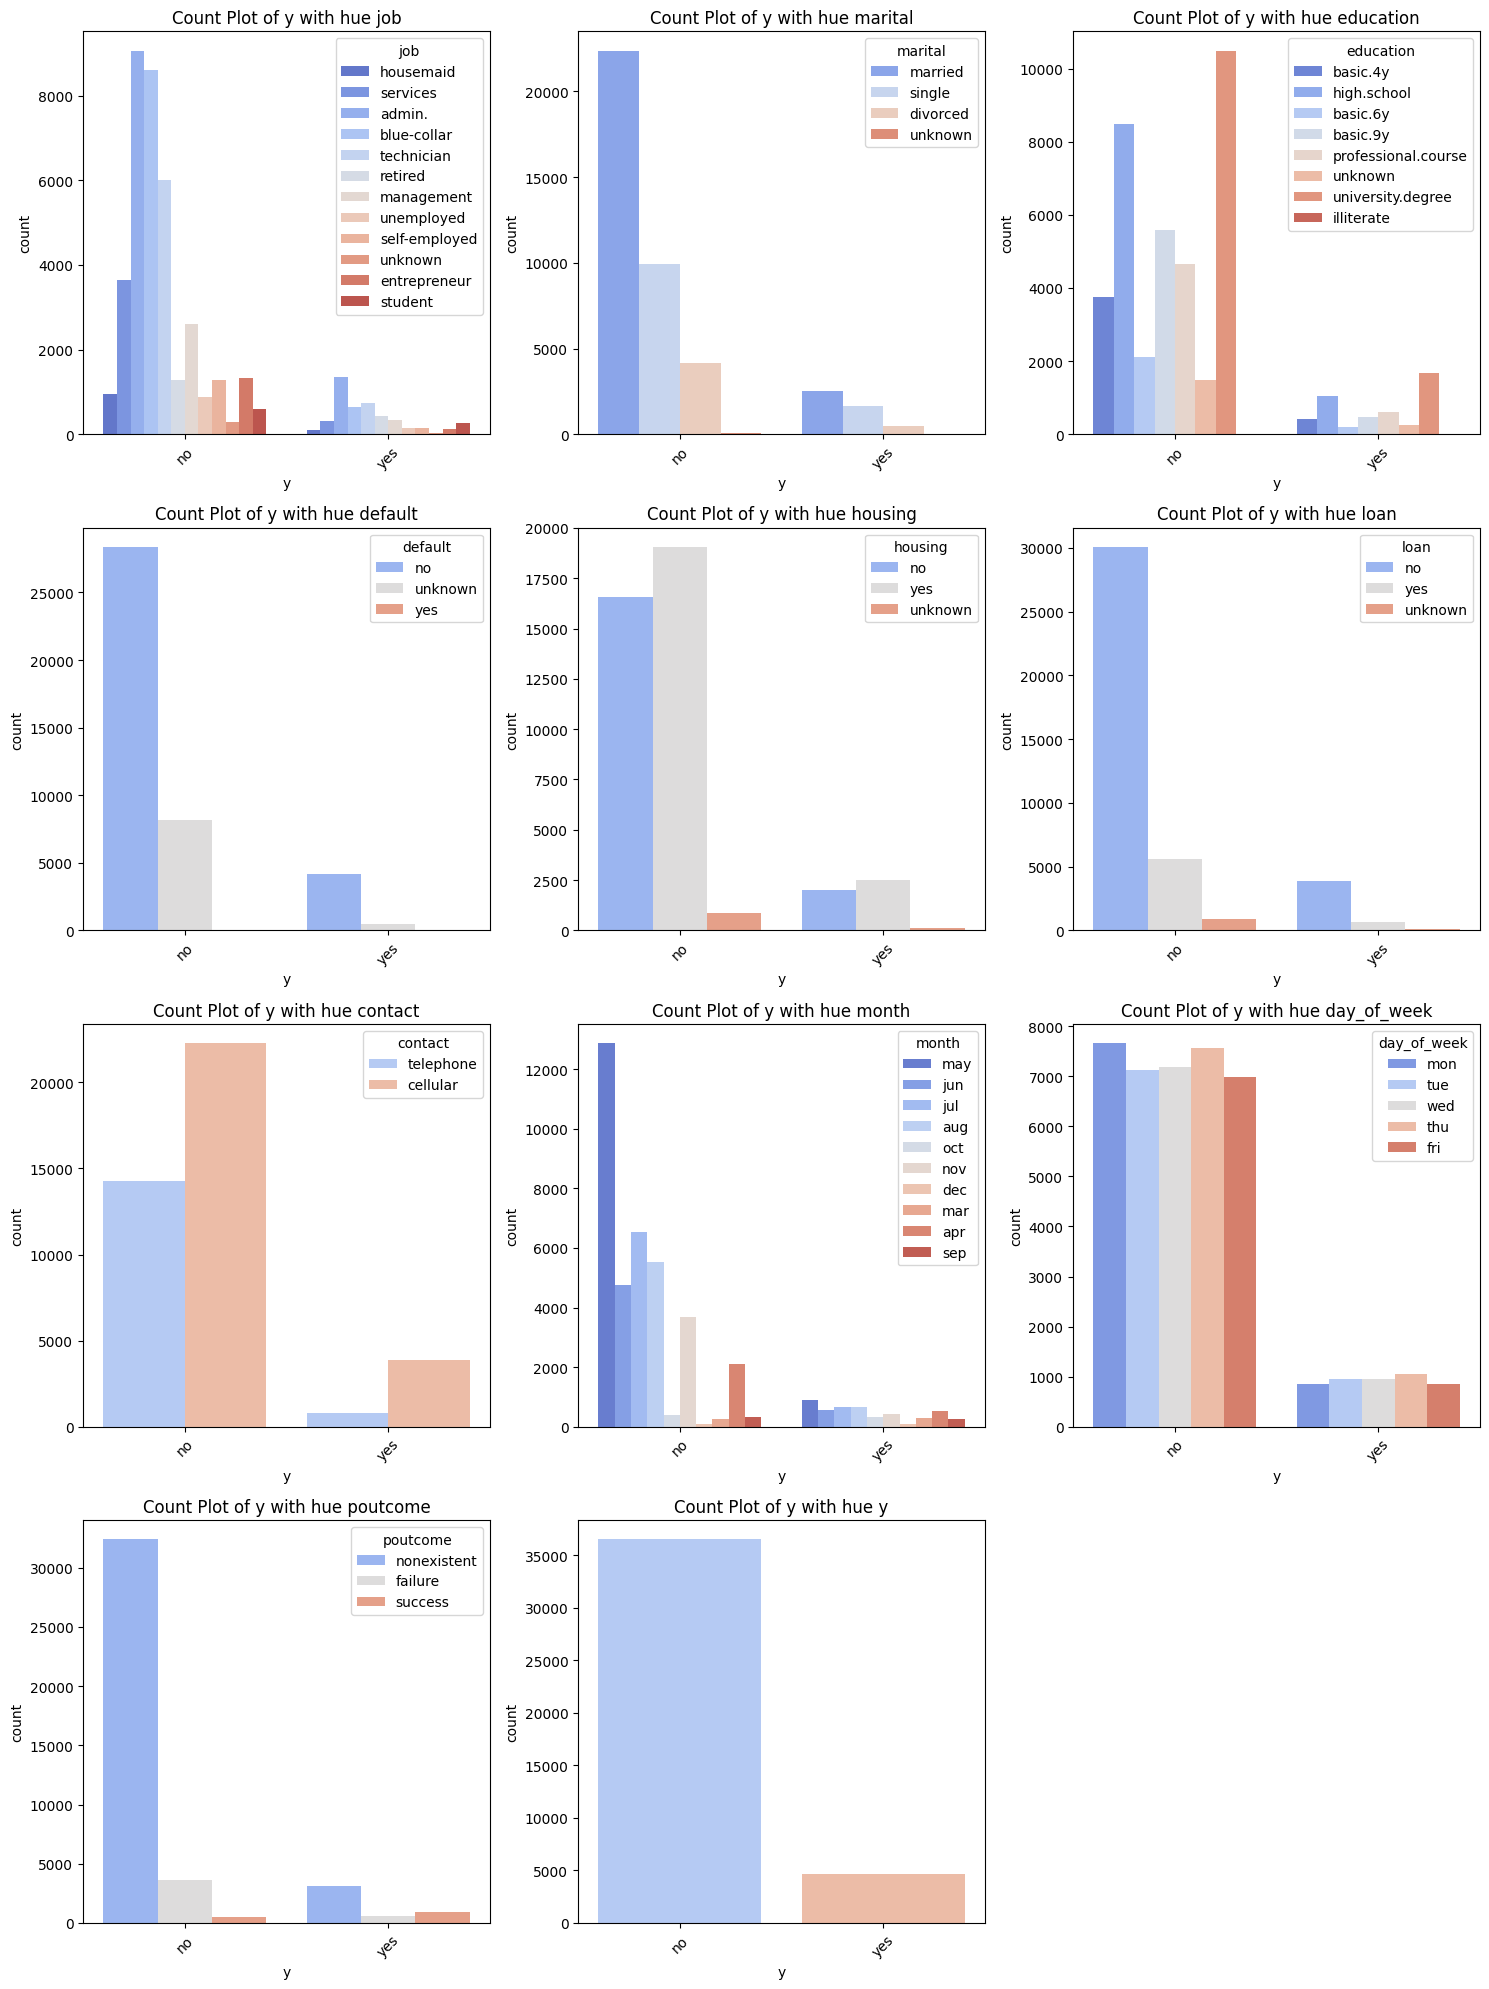

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Usar la variable ya definida cat_cols
columns = cat_cols

# Fijar el número de columnas por fila a 3
cols_per_row = 3

# Calcular el número de filas necesarias
num_rows = math.ceil(len(columns) / cols_per_row)

# Crear la figura con subgráficos (axes) y un tamaño más grande
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Asegurarse de que 'axes' sea una lista bidimensional
axes = axes.reshape(num_rows, cols_per_row) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(cols_per_row):
        if col_index < len(columns):
            sns.countplot(data=data_limpia, x="y", hue=columns[col_index], palette="coolwarm", ax=axes[row][col])
            axes[row][col].set_title(f"Count Plot of y with hue {columns[col_index]}")
            axes[row][col].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para que queden dentro
            col_index += 1
        else:
            # Ocultar los ejes vacíos en lugar de eliminarlos
            axes[row][col].axis("off")  # Desactivar los ejes vacíos

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [13]:
import pandas as pd
import json

# 1. Crear la columna numérica "y_n" a partir de la columna categórica "y"
datos["y_n"] = pd.factorize(datos["y"])[0]

# 2. Crear un diccionario con el mapeo de categorías a números
target_rules = {categoria: codigo for codigo, categoria in enumerate(datos["y"].unique())}

# 3. Guardar el diccionario en un archivo JSON
with open("target_rules.json", "w") as f:
    json.dump(target_rules, f, indent=4)  # indent=4 para que el JSON sea más legible

# 4. Mostrar la columna "y_n" y el diccionario para verificar
print("Columna 'y_n':")
print(datos["y_n"].head())

print("\nDiccionario de mapeo:")
print(target_rules)

Columna 'y_n':
0    0
1    0
2    0
3    0
4    0
Name: y_n, dtype: int64

Diccionario de mapeo:
{'no': 0, 'yes': 1}


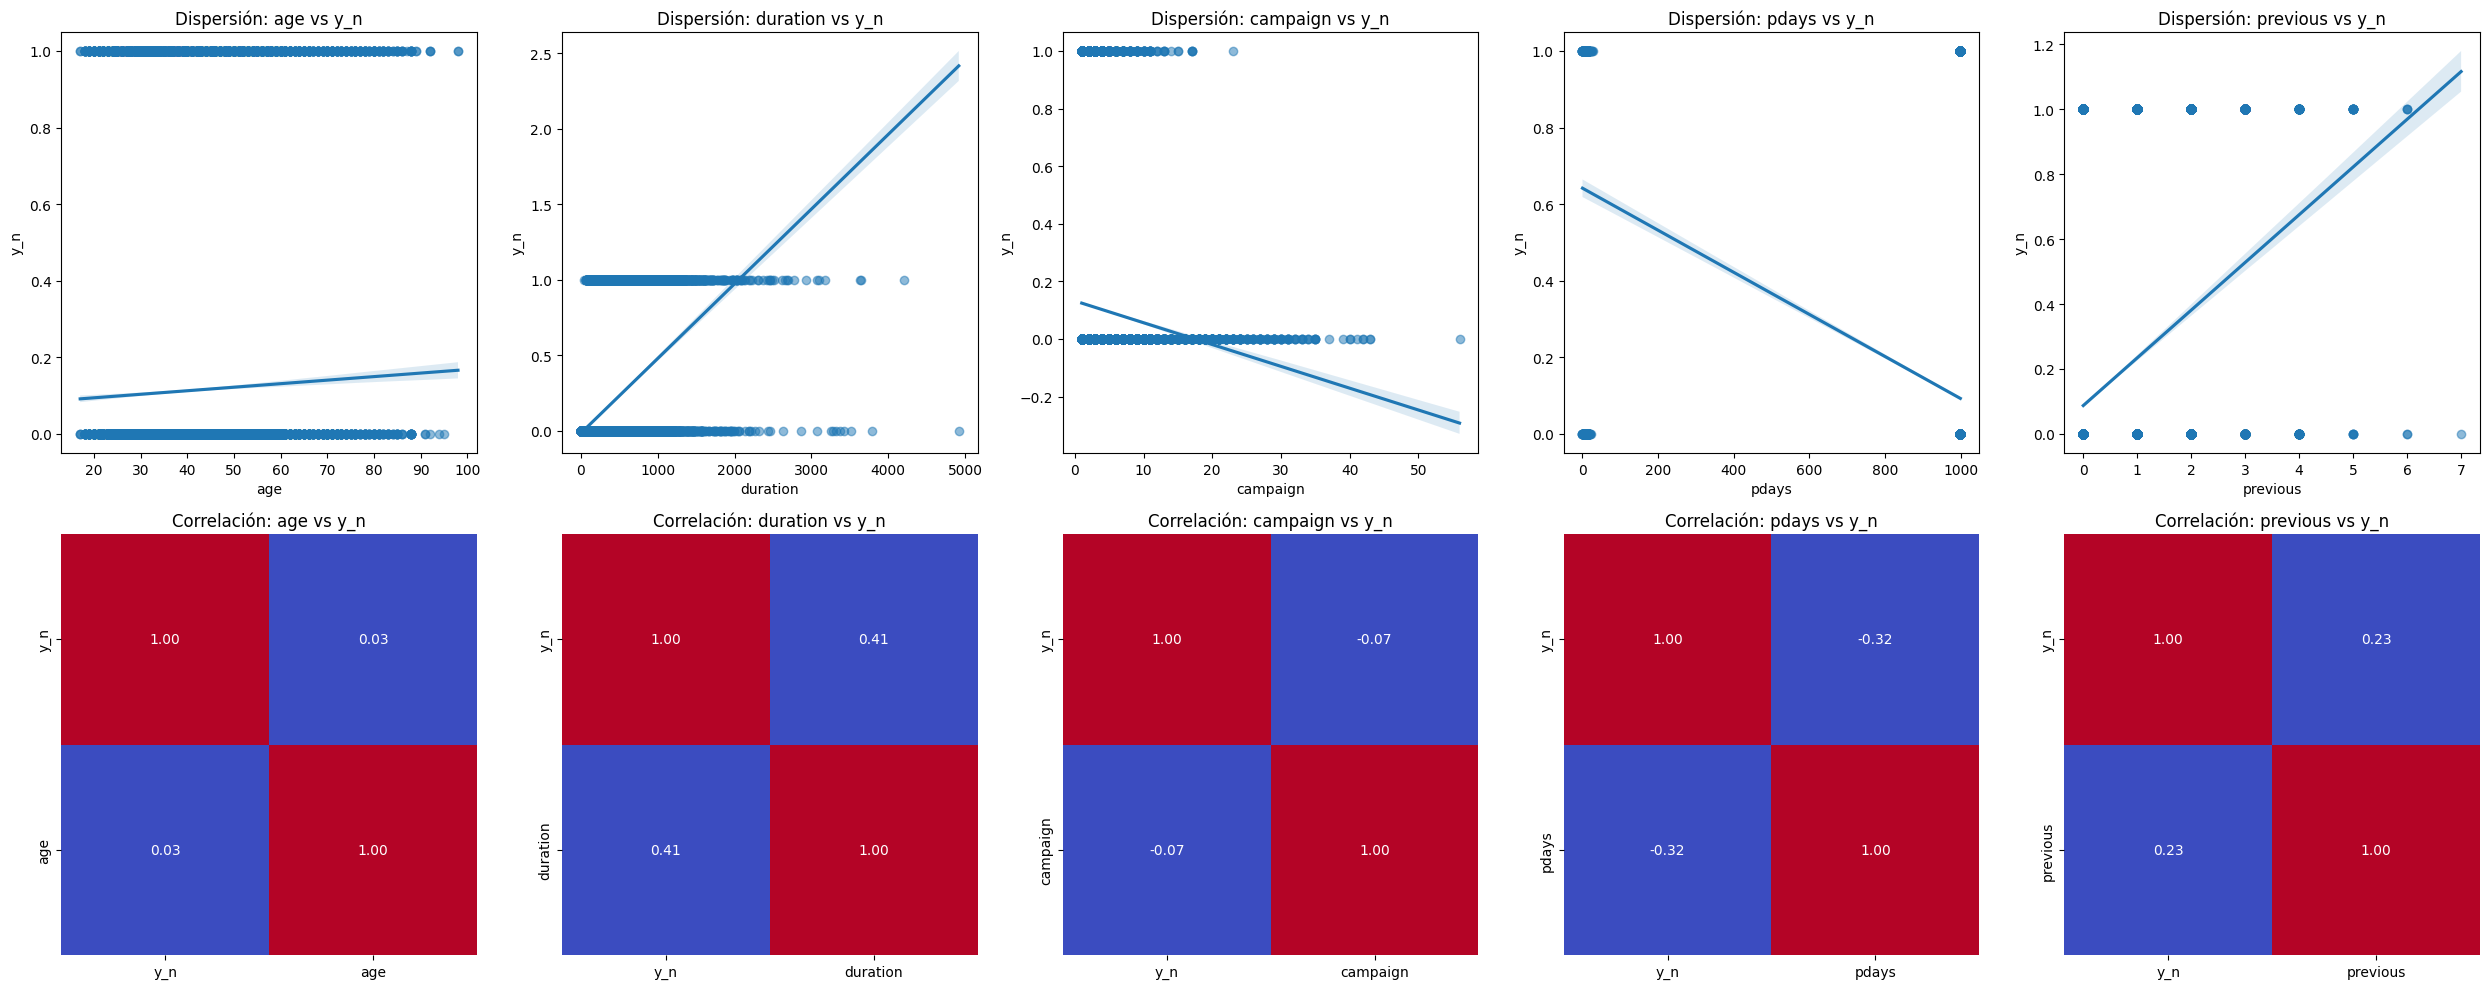

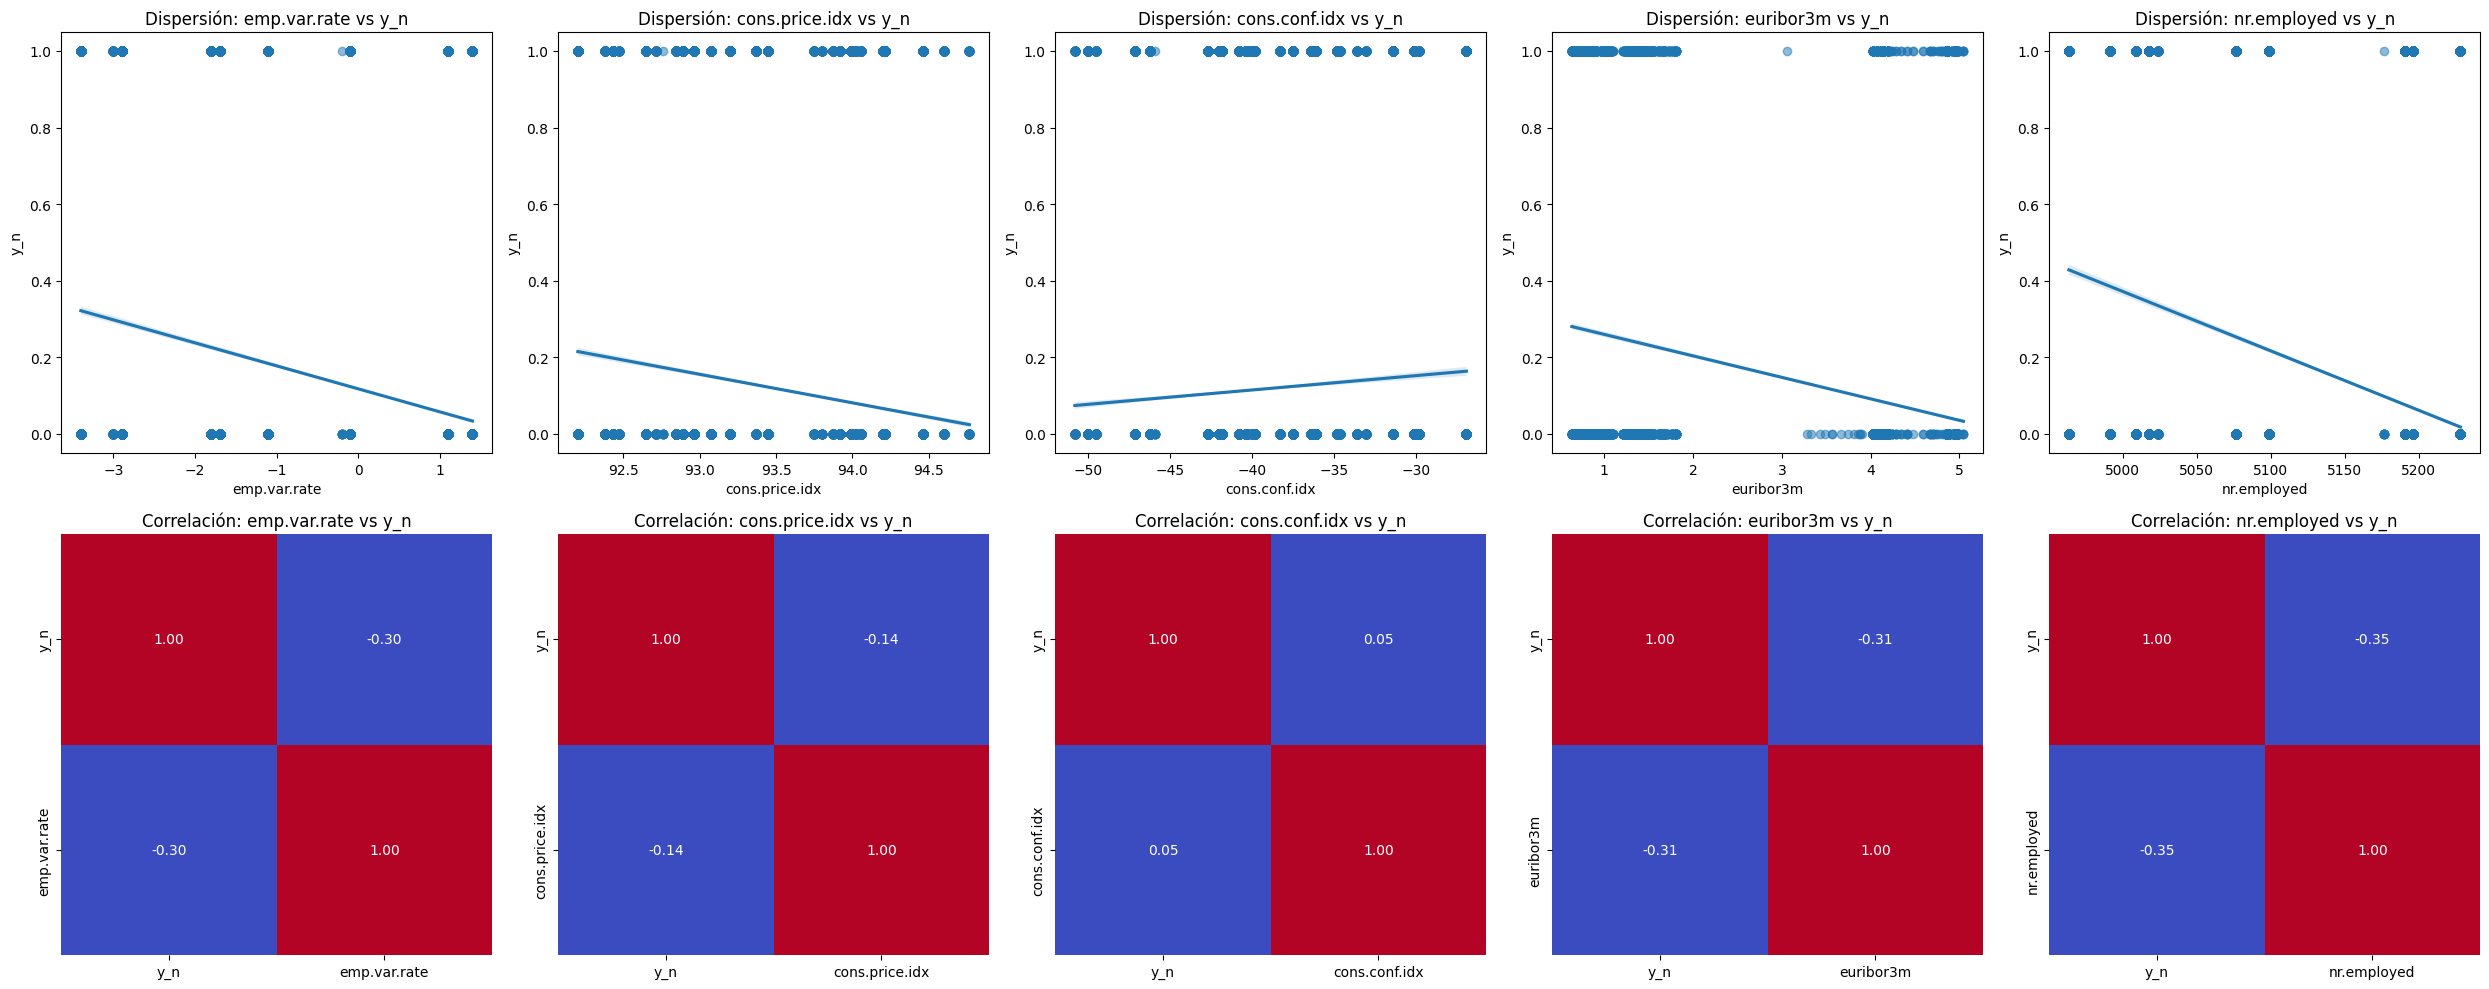

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def graficar_dispersiones_y_heatmaps(df, columnas, target_col, n_columnas=5):

    # Verificar que la columna target exista en el DataFrame
    if target_col not in df.columns:
        raise KeyError(f"La columna '{target_col}' no existe en el DataFrame.")

    # Calcular el número de filas necesarias
    n = len(columnas)
    n_filas = math.ceil(n / n_columnas)

    # Crear la figura con el número dinámico de filas y columnas
    fig, axis = plt.subplots(n_filas * 2, n_columnas, figsize=(n_columnas * 5, n_filas * 10))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar los gráficos de dispersión y heatmaps
    for i, col in enumerate(columnas):
        # Gráfico de dispersión
        sns.regplot(ax=axis[i], data=df, x=col, y=target_col, scatter_kws={"alpha": 0.5})
        axis[i].set_title(f'Dispersión: {col} vs {target_col}', fontsize=12)

        # Heatmap de correlación
        sns.heatmap(df[[target_col, col]].corr(), annot=True, fmt=".2f", ax=axis[i + n_columnas * n_filas], cbar=False, cmap="coolwarm")
        axis[i + n_columnas * n_filas].set_title(f'Correlación: {col} vs {target_col}', fontsize=12)

    # Ocultar los ejes vacíos
    for j in range((n_filas * 2) * n_columnas):
        if j >= n + n_filas * n_columnas:
            axis[j].axis("off")

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

# Llamar a la función con las columnas numéricas y la columna target factorizada ("y_n")
graficar_dispersiones_y_heatmaps(datos, num_cols[0:5], "y_n")
graficar_dispersiones_y_heatmaps(datos, num_cols[5:10], "y_n")

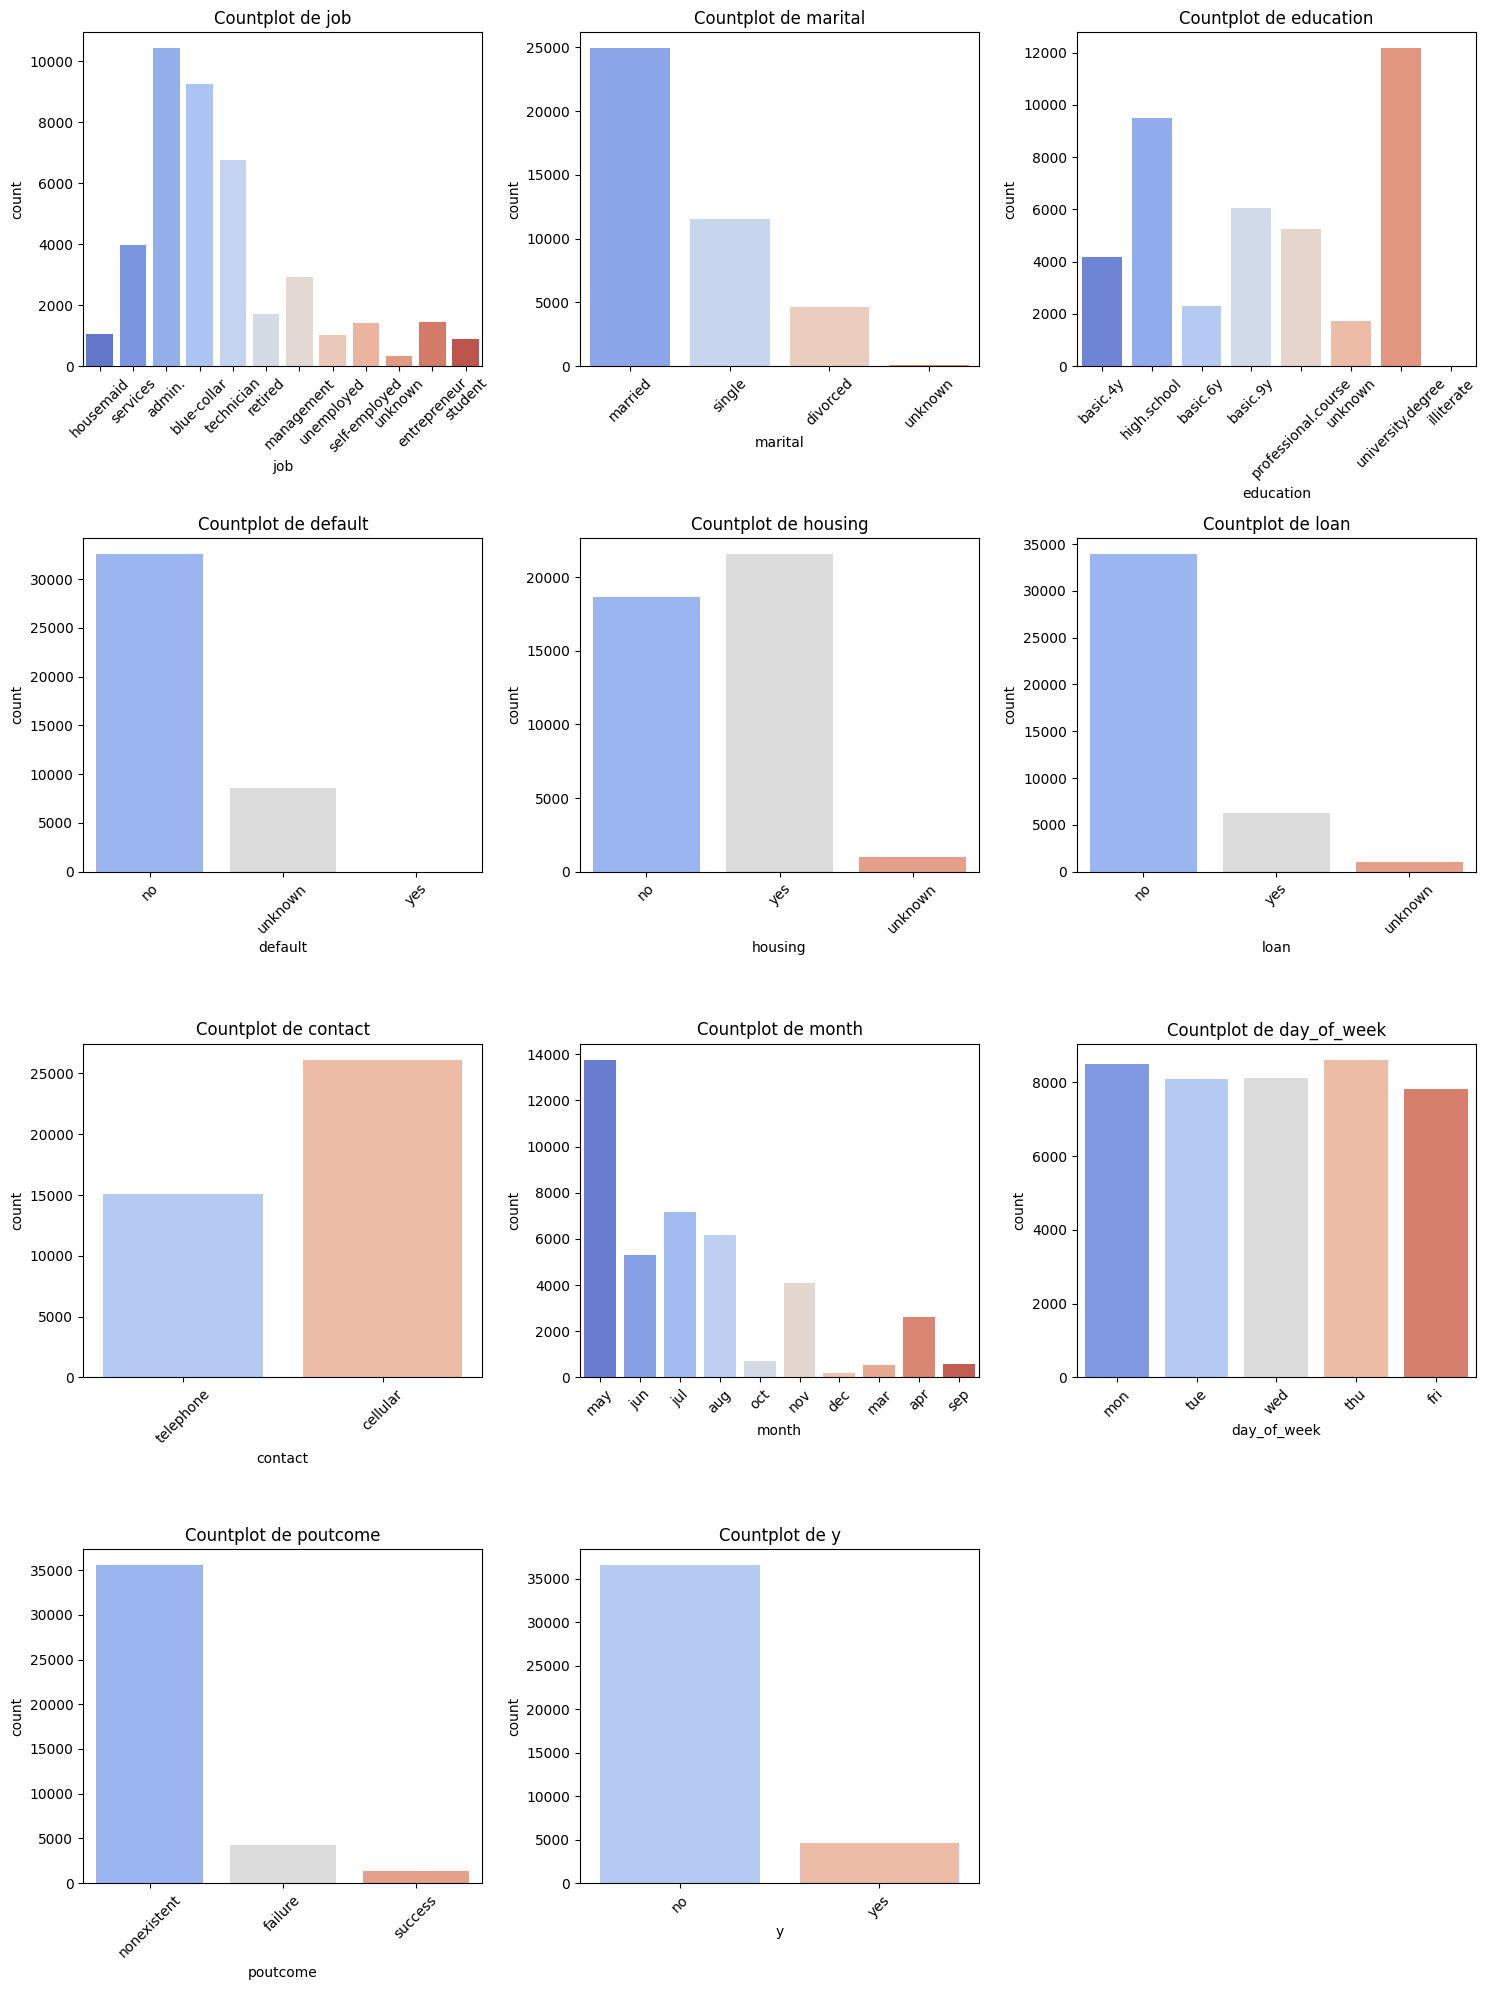

In [22]:
def graficar_countplots(df, cat_cols, cols_per_row=3):

    # Calcular el número de filas necesarias
    n = len(cat_cols)
    num_rows = math.ceil(n / cols_per_row)

    # Crear la figura con subgráficos (axes) y un tamaño más grande
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

    # Aplanar el array de ejes para facilitar la iteración
    axes = axes.flatten() if num_rows > 1 else [axes]

    # Generar los countplots
    for i, col in enumerate(cat_cols):
        if i < len(axes):  # Verificar que el índice esté dentro del rango de ejes
            sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette="coolwarm", legend=False)
            axes[i].set_title(f'Countplot de {col}', fontsize=12)
            axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x
        else:
            break  # Salir del bucle si no hay más ejes disponibles

    # Ocultar ejes vacíos si hay menos columnas que cols_per_row * num_rows
    for j in range(n, cols_per_row * num_rows):
        if j < len(axes):  # Verificar que el índice esté dentro del rango de ejes
            fig.delaxes(axes[j])

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

# Graficar countplots
graficar_countplots(datos, cat_cols, cols_per_row=3)

In [48]:
def automatizar_factorizacion(df, columnas):
    
    transformacion_reglas = {}
    col_factorizadas = []
    
    for col in columnas:
        df[f"{col}_n"] = pd.factorize(df[col])[0]  # Agregar columna factorizada
        col_factorizadas.append(f"{col}_n")
        transformacion_reglas[col] = {row[col]: row[f"{col}_n"] for _, row in df[[col, f"{col}_n"]].drop_duplicates().iterrows()}
    
    with open("../models/transformacion_reglas.json", "w") as f:
        json.dump(transformacion_reglas, f, indent=4)
    
    print("Factorización completada y reglas guardadas en 'transformacion_reglas.json'.")
    return df, col_factorizadas

In [49]:
# Llamar a la función para automatizar la factorización
data, col_factorizadas = automatizar_factorizacion(datos, cat_cols)

# Imprimir las columnas factorizadas para verificar
print("Columnas factorizadas:", col_factorizadas)

Factorización completada y reglas guardadas en 'transformacion_reglas.json'.
Columnas factorizadas: ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']


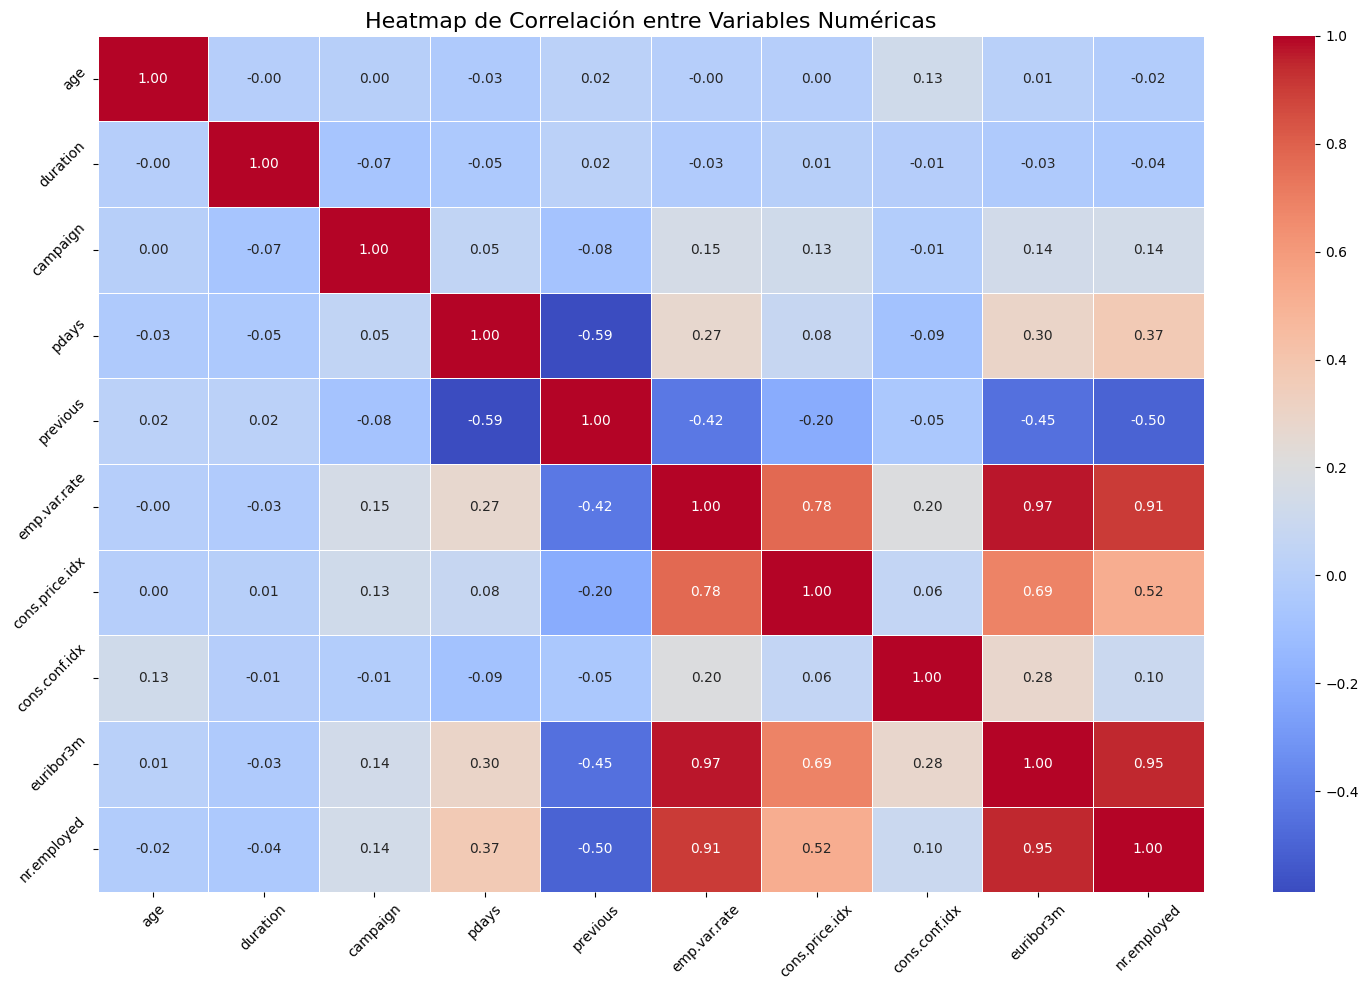

In [27]:
fig, axis = plt.subplots(figsize=(15, 10))

# Heatmap de correlación
sns.heatmap(data_limpia[num_cols].corr(),annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)

# Título y etiquetas
plt.title("Heatmap de Correlación entre Variables Numéricas", fontsize=16)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.yticks(rotation=45)  # Rotar etiquetas del eje y

# Ajustar el layout
plt.tight_layout()

# Mostrar el heatmap
plt.show()

Factorización completada y reglas guardadas en 'transformacion_reglas.json'.


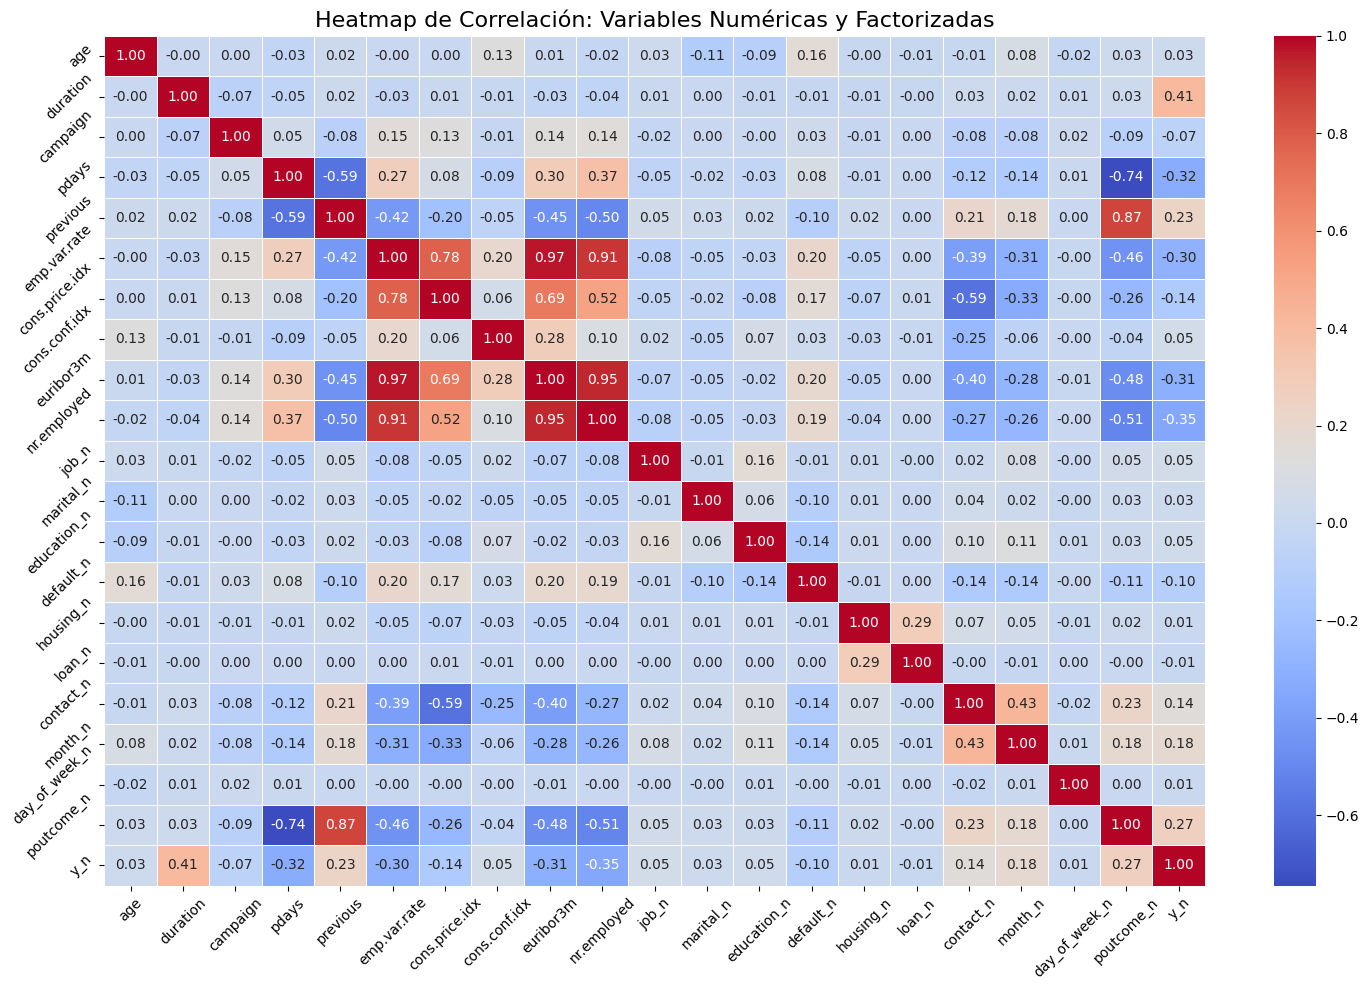

In [38]:
# Llamar a la función para automatizar la factorización
data, col_factorizadas = automatizar_factorizacion(datos, cat_cols)

# Convertir num_cols y col_factorizadas a listas de Python
num_cols_list = list(num_cols)
col_factorizadas_list = list(col_factorizadas)

# Combinar las columnas numéricas originales y las columnas factorizadas
columnas_combinadas = num_cols_list + col_factorizadas_list

# Verificar que las columnas existan en el DataFrame
for col in columnas_combinadas:
    if col not in data.columns:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

# Crear la figura
plt.figure(figsize=(15, 10))

# Heatmap de correlación
sns.heatmap(data[columnas_combinadas].corr(),annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)

# Título y etiquetas
plt.title("Heatmap de Correlación: Variables Numéricas y Factorizadas", fontsize=16)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.yticks(rotation=45)  # Rotar etiquetas del eje y

# Ajustar el layout
plt.tight_layout()

# Mostrar el heatmap
plt.show()

In [55]:
# Verificar las columnas del DataFrame
print("Columnas en 'datos':", datos.columns.tolist())

# Definir las columnas categóricas y numéricas
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
num_cols = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
target = "y"

# Llamar a la función para automatizar la factorización
data, col_factorizadas = automatizar_factorizacion(datos, cat_cols + [target])

Columnas en 'datos': ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_n', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n']
Factorización completada y reglas guardadas en 'transformacion_reglas.json'.


In [56]:
# Crear el dataset factorizado
n_data = datos.drop(columns=cat_cols + [target])  # Eliminar columnas categóricas originales y la columna target original
n_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,1,1,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,1,0,1,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,2,0,2,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,5,0,4,0,1,0,1,5,4,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,3,0,4,0,0,0,1,5,4,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,5,0,6,0,1,0,1,5,4,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,4,0,4,0,0,0,1,5,4,0


In [57]:
n_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.250097,1.979581,0.169904
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,0.455754
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000


In [58]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  y_n             41188 non-null  int64  
 11  job_n           41188 non-null  int64  
 12  marital_n       41188 non-null  int64  
 13  education_n     41188 non-null  int64  
 14  default_n       41188 non-null  int64  
 15  housing_n       41188 non-null  int64  
 16  loan_n          41188 non-null  int64  
 17  contact_n       41188 non-null 

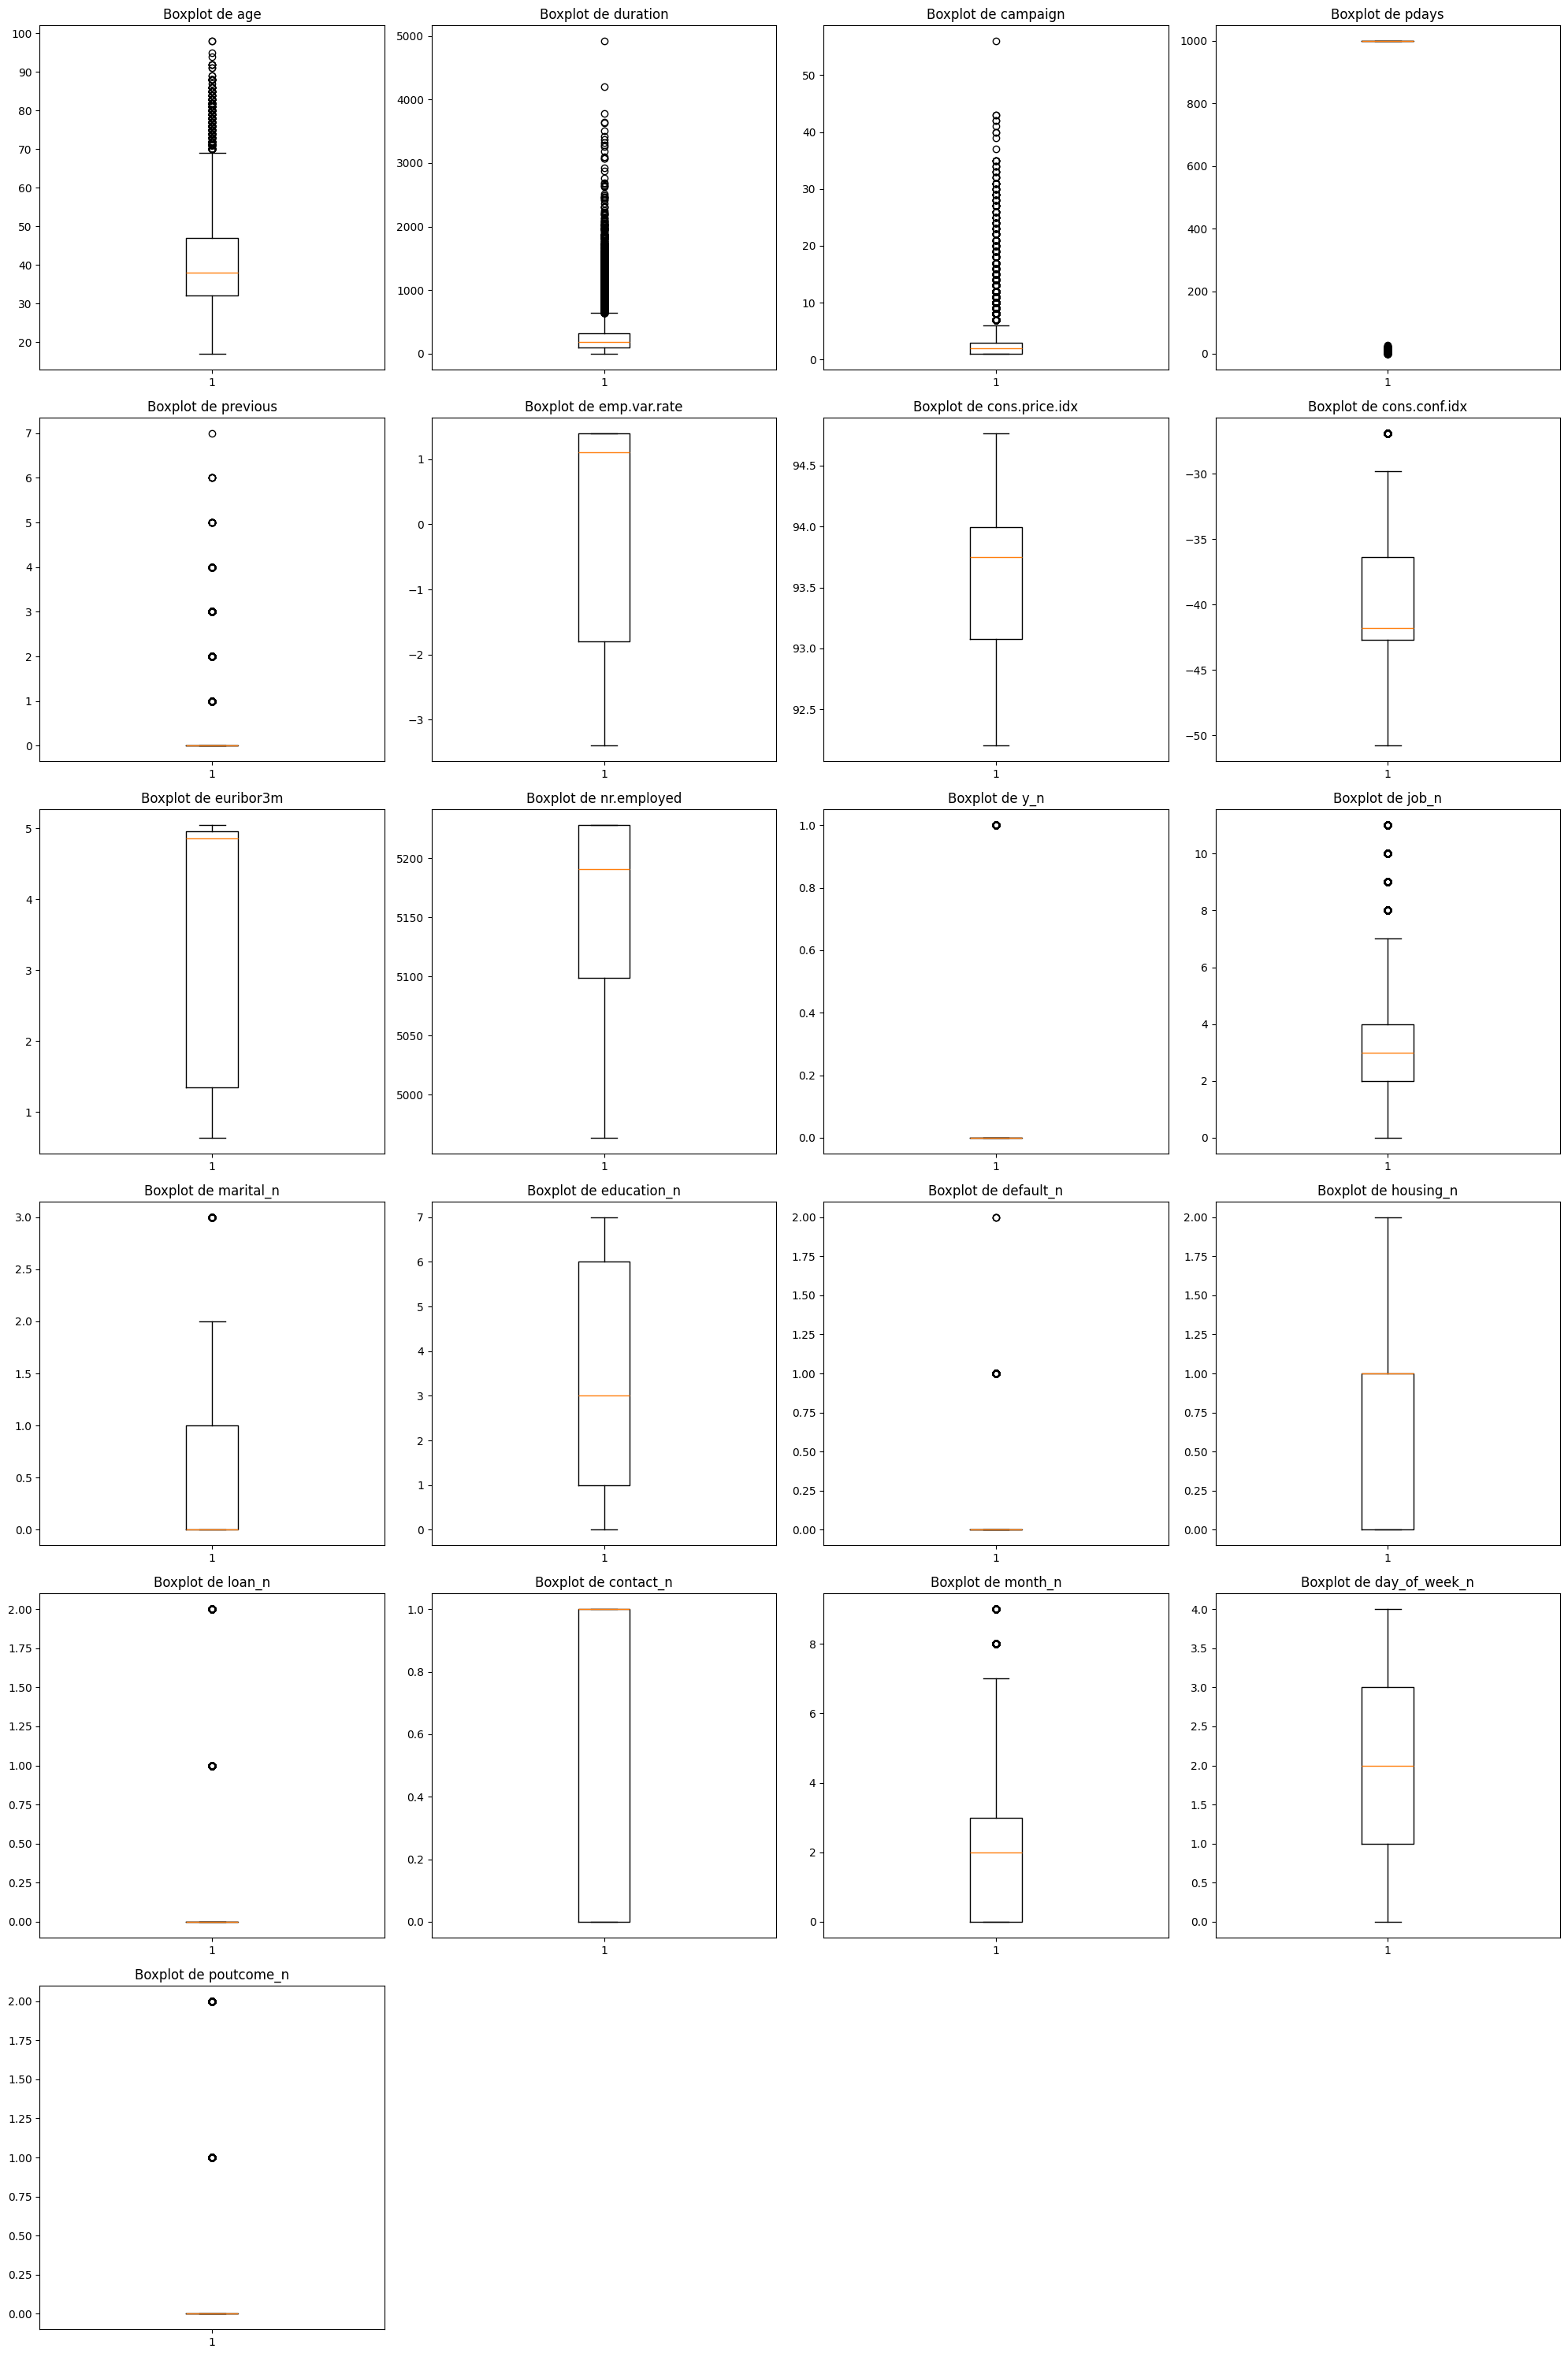

In [62]:
def generar_boxplots_n_data(n_data):
    # Obtener las columnas de n_data (todas son numéricas)
    columnas = n_data.columns

    # Definir el número de columnas y filas para los subgráficos
    n_columnas = 4  # Número de gráficos por fila
    n_filas = (len(columnas) + n_columnas - 1) // n_columnas  # Redondeo hacia arriba

    # Crear la figura y los ejes para los subgráficos
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar un boxplot para cada columna de n_data
    for i, col in enumerate(columnas):
        axis[i].boxplot(n_data[col].dropna())  # Crear el boxplot en el eje correspondiente, eliminando valores nulos
        axis[i].set_title(f'Boxplot de {col}')  # Establecer el título del gráfico

    # Si hay menos gráficos que subgráficos, ocultar los ejes restantes
    for j in range(i + 1, len(axis)):
        axis[j].axis('off')

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

# Llamar a la función para generar los boxplots de n_data
generar_boxplots_n_data(n_data)

In [63]:
import os 

total_data_con_outliers = n_data.copy() 
total_data_sin_outliers = n_data.copy()

col_con_outliers = ["age", "duration", "campaign", "pdays", "job_n", "poutcome_n", "loan_n", "default_n", "previous", "month_n"] # añadir outliers

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in col_con_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'duration': [0, np.float64(644.5)],
 'campaign': [1, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)],
 'job_n': [0, np.float64(7.0)],
 'poutcome_n': [np.float64(0.0), np.float64(0.0)],
 'loan_n': [np.float64(0.0), np.float64(0.0)],
 'default_n': [np.float64(0.0), np.float64(0.0)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'month_n': [0, np.float64(7.5)]}

In [64]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y_n               0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
dtype: int64

In [65]:
total_data_sin_outliers

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0,1,0.0,0,0.0,0,0.0,0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0,1,0.0,1,0.0,0,0.0,0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,2.0,0,2,0.0,0,0.0,0,0.0,0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0,1,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,5.0,0,4,0.0,1,0.0,1,5.0,4,0.0
41184,46.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,3.0,0,4,0.0,0,0.0,1,5.0,4,0.0
41185,56.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,5.0,0,6,0.0,1,0.0,1,5.0,4,0.0
41186,44.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,4.0,0,4,0.0,0,0.0,1,5.0,4,0.0


In [67]:
from sklearn.preprocessing import MinMaxScaler 

def normalize_and_create(data, columns_to_normalize, new_column_name='econ_index'):

    # Crear un objeto MinMaxScaler
    scaler = MinMaxScaler()

    # Normalizar las columnas especificadas
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

    # Crear la nueva variable 'risk' como la media de las columnas normalizadas
    data[new_column_name] = data[columns_to_normalize].mean(axis=1)

    return data

# Definir las columnas que se van a normalizar
columns_to_normalize_econ_index = ['emp.var.rate', 'euribor3m', 'nr.employed']

# Normalizar y crear la variable 'risk' para el conjunto con outliers
total_data_con_outliers = normalize_and_create(total_data_con_outliers, columns_to_normalize_econ_index)

# Normalizar y crear la variable 'risk' para el conjunto sin outliers
total_data_sin_outliers = normalize_and_create(total_data_sin_outliers, columns_to_normalize_econ_index)

In [68]:
total_data_con_outliers.drop(columns_to_normalize_econ_index, axis= 1, inplace= True)
total_data_sin_outliers.drop(columns_to_normalize_econ_index, axis= 1, inplace= True)

In [69]:
total_data_sin_outliers

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y_n,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,econ_index
0,56.0,261.0,1.0,999.0,0.0,93.994,-36.4,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.918205
1,57.0,149.0,1.0,999.0,0.0,93.994,-36.4,0,1.0,0,1,0.0,0,0.0,0,0.0,0,0.0,0.918205
2,37.0,226.0,1.0,999.0,0.0,93.994,-36.4,0,1.0,0,1,0.0,1,0.0,0,0.0,0,0.0,0.918205
3,40.0,151.0,1.0,999.0,0.0,93.994,-36.4,0,2.0,0,2,0.0,0,0.0,0,0.0,0,0.0,0.918205
4,56.0,307.0,1.0,999.0,0.0,93.994,-36.4,0,1.0,0,1,0.0,0,0.0,0,0.0,0,0.0,0.918205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,334.0,1.0,999.0,0.0,94.767,-50.8,1,5.0,0,4,0.0,1,0.0,1,5.0,4,0.0,0.189496
41184,46.0,383.0,1.0,999.0,0.0,94.767,-50.8,0,3.0,0,4,0.0,0,0.0,1,5.0,4,0.0,0.189496
41185,56.0,189.0,2.0,999.0,0.0,94.767,-50.8,0,5.0,0,6,0.0,1,0.0,1,5.0,4,0.0,0.189496
41186,44.0,442.0,1.0,999.0,0.0,94.767,-50.8,1,4.0,0,4,0.0,0,0.0,1,5.0,4,0.0,0.189496


In [70]:
total_data_con_outliers.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'y_n', 'job_n', 'marital_n', 'education_n',
       'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n',
       'day_of_week_n', 'poutcome_n', 'econ_index'],
      dtype='object')>

In [74]:
from sklearn.model_selection import train_test_split

# Obtener las columnas numéricas
num_variables = total_data_con_outliers.copy().drop("y_n", axis=1).columns.tolist()

# Dividir el conjunto de datos en train y test
X_con_outliers = total_data_con_outliers.drop("y_n", axis=1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("y_n", axis=1)[num_variables]
y = total_data_con_outliers["y_n"]

# Dividir los datos con outliers
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)

# Dividir los datos sin outliers
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size=0.2, random_state=42)

# Guardar los datasets en archivos Excel
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)

# Mostrar las primeras filas del conjunto de entrenamiento con outliers
X_train_con_outliers.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,econ_index
12556,40,94,2,999,0,93.918,-42.7,3,0,3,1,1,0,0,2,0,0,0.993577
35451,31,116,4,999,0,92.893,-46.2,2,0,6,0,0,0,1,0,0,0,0.327970
30592,59,13,6,999,1,92.893,-46.2,5,0,0,0,0,0,1,0,0,1,0.336283
17914,43,94,5,999,0,93.918,-42.7,0,2,3,0,1,0,1,2,1,0,0.993652
3315,39,344,2,999,0,93.994,-36.4,2,1,1,1,0,0,0,0,3,0,0.918432


In [75]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,econ_index
12556,-0.001669,-0.631114,-0.206242,0.194661,-0.350902,0.589080,-0.472769,-0.271142,-0.738185,-0.12745,1.948567,0.787712,-0.438945,-1.319656,-0.104938,-1.402425,-0.373487,0.828434
35451,-0.864095,-0.546321,0.513676,0.194661,-0.350902,-1.180760,-1.229916,-0.677848,-0.738185,1.24463,-0.512631,-1.056870,-0.438945,0.757773,-0.929383,-1.402425,-0.373487,-1.218443
30592,1.819007,-0.943306,1.233593,0.194661,1.677559,-1.180760,-1.229916,0.542271,-0.738185,-1.49953,-0.512631,-1.056870,-0.438945,0.757773,-0.929383,-1.402425,1.822906,-1.192880
17914,0.285806,-0.631114,0.873635,0.194661,-0.350902,0.589080,-0.472769,-1.491260,2.126401,-0.12745,-0.512631,0.787712,-0.438945,0.757773,-0.104938,-0.693804,-0.373487,0.828667
3315,-0.097494,0.332441,-0.206242,0.194661,-0.350902,0.720307,0.890097,-0.677848,0.694108,-1.04217,1.948567,-1.056870,-0.438945,-1.319656,-0.929383,0.723439,-0.373487,0.597347


In [76]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,econ_index
12556,0.283951,0.019113,0.018182,1.0,0.000000,0.669135,0.338912,0.272727,0.000000,0.428571,0.5,0.5,0.0,0.0,0.222222,0.00,0.0,0.999179
35451,0.172840,0.023587,0.054545,1.0,0.000000,0.269680,0.192469,0.181818,0.000000,0.857143,0.0,0.0,0.0,1.0,0.000000,0.00,0.0,0.275977
30592,0.518519,0.002643,0.090909,1.0,0.142857,0.269680,0.192469,0.454545,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.00,0.5,0.285009
17914,0.320988,0.019113,0.072727,1.0,0.000000,0.669135,0.338912,0.000000,0.666667,0.428571,0.0,0.5,0.0,1.0,0.222222,0.25,0.0,0.999261
3315,0.271605,0.069947,0.018182,1.0,0.000000,0.698753,0.602510,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.0,0.000000,0.75,0.0,0.917531


In [77]:
print(X_train_con_outliers_scal.isnull().sum())

age               0
duration          0
campaign          0
pdays             0
previous          0
cons.price.idx    0
cons.conf.idx     0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
econ_index        0
dtype: int64
